# Easy21 Reinforcement Learning

This is an attempt to implement the [Easy21][] assignment from
[David Silver's Reinforcement Learning class][class].

The core implementation is in Rust, and can be found at https://github.com/toolness/ml-fun/tree/master/rl/easy21.

[Easy21]: http://www0.cs.ucl.ac.uk/staff/d.silver/web/Teaching_files/Easy21-Johannes.pdf
[class]: http://www0.cs.ucl.ac.uk/staff/d.silver/web/Teaching.html

In [2]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits import mplot3d

import easy21

%matplotlib inline
%load_ext autoreload
%autoreload 2

## Monte Carlo

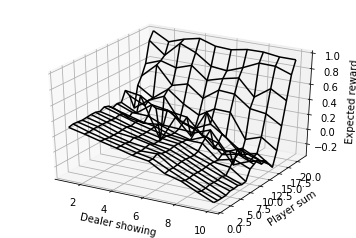

In [3]:
q_star = easy21.run_monte_carlo(1_000_000)

q_star.plot_optimal_reward()

## Sarsa(λ)

In [7]:
def plot_lambda_mse(title, fn):
    lambda_vals = []
    mean_squared_errs = []
    for i in range(0, 11, 1):
        lambda_val = i * 0.1
        lambda_vals.append(lambda_val)
        q = fn(lambda_val)
        mean_squared_errs.append(q_star.get_mean_squared_err(q))

    plt.plot(lambda_vals, mean_squared_errs)
    plt.title(f"Mean squared errors for {title} values")
    plt.xlabel("λ")
    plt.ylabel("Mean squared error from Q*(s, a)")
    plt.show()

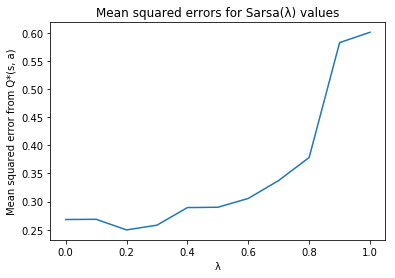

In [8]:
plot_lambda_mse("Sarsa(λ)", lambda v: easy21.run_sarsa(1000, v))

In [11]:
def graph_episodes(title, lambda_val, fn):
    EPISODE_RANGE = range(1, 1001)
    eps = []
    for ep in EPISODE_RANGE:
        q = fn(ep, lambda_val)
        err = q_star.get_mean_squared_err(q)
        eps.append(err)
    ep_nums = []
    mean_squared_errs = []
    for i in EPISODE_RANGE:
        ep_nums.append(i)
        mean_squared_errs.append(eps[i - 1])
    plt.plot(ep_nums, mean_squared_errs)
    plt.title(f"{title} mean squared errors for λ={lambda_val}")
    plt.xlabel("Episode number")
    plt.ylabel("Mean squared error")
    return plt.show()

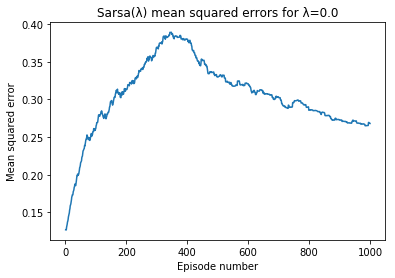

In [12]:
graph_episodes("Sarsa(λ)", 0.0, lambda ep, v: easy21.run_sarsa(ep, v))

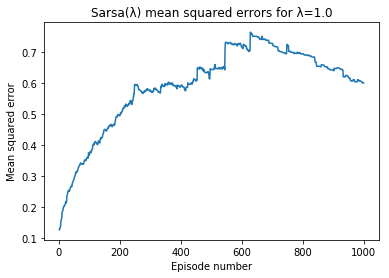

In [13]:
graph_episodes("Sarsa(λ)", 1.0, lambda ep, v: easy21.run_sarsa(ep, v))

## Linear function approximation

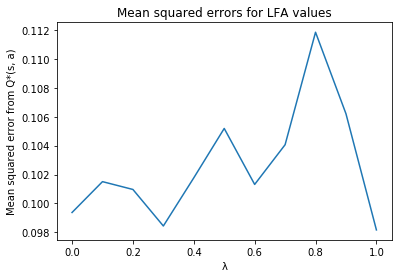

In [14]:
plot_lambda_mse("LFA", lambda v: easy21.run_lfa(1000, v, epsilon=0.05, step_size=0.01))

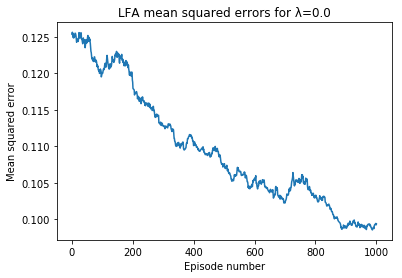

In [15]:
graph_episodes("LFA", 0.0, lambda ep, v: easy21.run_lfa(ep, v, epsilon=0.05, step_size=0.01))

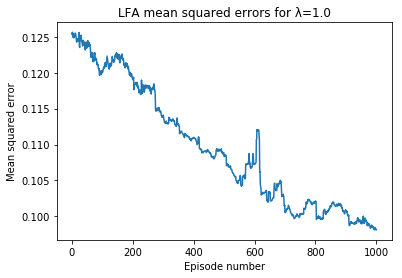

In [16]:
graph_episodes("LFA", 1.0, lambda ep, v: easy21.run_lfa(ep, v, epsilon=0.05, step_size=0.01))